# Introduction to scikit-learn
[Scikit-learn](http://scikit-learn.org/stable/index.html) provides a set of machine learning tools to infer and predict properties of data. It is a scientific toolbox built around Scipy, dedicated to machine learning. The toolbox provides a large set of state of the art algorithms. Using the same API, it is easy to develop its own processing chain, including model selection, learning, prediction and accuracy assessment.

The following example is taken from [http://scikit-learn.org/stable/tutorial/statistical_inference/index.html]

## Loading data
Several conventional data set are included in the toolbox. It is off course possible to use its own data: it should be represented by a 2D Scipy Array. The first axis (lines) is the samples and the second axis is the features.

Let start with the well known *Iris* data set.

In [3]:
from sklearn import datasets
iris = datasets.load_iris()
data = iris.data
data.shape
iris.target.max()

2

We have 150 samples with 4 features. We can plot the data for some pairs of features.

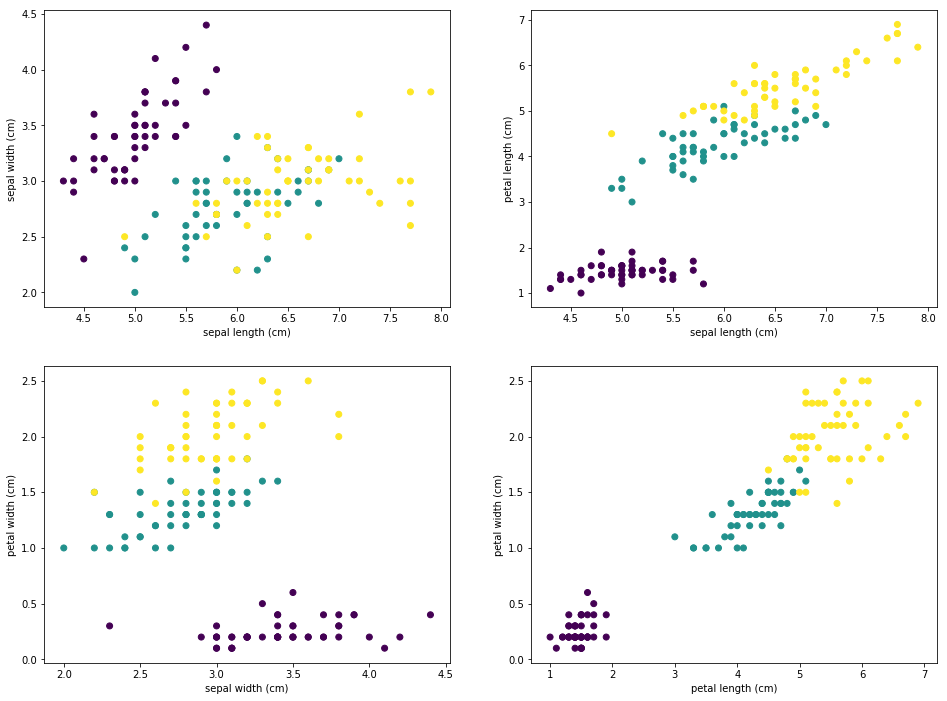

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
f,((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(16, 12))
# Axe 1 and 2
ax1.scatter(data[:,0], data[:,1],c=iris.target,)
ax1.set_xlabel(iris.feature_names[0])
ax1.set_ylabel(iris.feature_names[1])

# Axe 1 and 3
ax2.scatter(data[:,0], data[:,2],c=iris.target,)
ax2.set_xlabel(iris.feature_names[0])
ax2.set_ylabel(iris.feature_names[2])

# Axe 2 and 4
ax3.scatter(data[:,1], data[:,3],c=iris.target,)
ax3.set_xlabel(iris.feature_names[1])
ax3.set_ylabel(iris.feature_names[3])

# Axe 3 and 4
ax4.scatter(data[:,2], data[:,3],c=iris.target,)
ax4.set_xlabel(iris.feature_names[2])
ax4.set_ylabel(iris.feature_names[3])

## Supervised learning
The problem is to learn a function linking the observation (here *data*) and the external data (here *target*). With scikit-learn, we need to select one alorithm then apply the *fit* method and the *predict* method. Using a K-Nearest Neighbors classifiers, it reduces to

In [5]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier() # Creation of the classifier
knn.fit(iris.data, iris.target) # Model fitting
y_predict = knn.predict(iris.data) # Prediction

print(y_predict[::10])
print(iris.target[::10])

[0 0 0 0 0 1 1 2 1 1 2 2 2 2 2]
[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2]


Ok, easy. But in practice we never do that: we should fit and predict with different samples. We will see later that it leads to a biased estimation of the true error rate of our algorithm. We need to split the data set into a training set and a validation set. Hopefully, scikit-learn provides a set of tools to manipulate the data. Furthermore, since the *fit* and the *predict* function are always the same whatever the algorithm, benchmarking using scikit-learn is super easy.

In [6]:
from sklearn import linear_model, svm
from sklearn.model_selection import train_test_split
import scipy as sp
from sklearn.metrics import accuracy_score

# Init classifier
classifiers = [linear_model.LogisticRegression(),svm.SVC(kernel='linear'), KNeighborsClassifier()]
names = ["Logistic Regression", "Support Vector Machines", "K Nearest Neighbors"]

# Split data -> 2/3 for learning & 1/3 for validation
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.75, random_state=0)

for clf,name in zip(classifiers,names):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test) # predict the label of X_test from X_train and y_train
    error = accuracy_score(y_test, y_pred) # Compute the overall accuracy
    print('Errors for {1}: \t {0:.2f}'.format(error,name)) # \t means "tabular" space, and {0:.2f} 
                                                           # means we print only two first decimal

Errors for Logistic Regression: 	 0.93
Errors for Support Vector Machines: 	 0.99
Errors for K Nearest Neighbors: 	 0.95


## Model complexity
Each algorithm has a set of hyperparameters that needs to be optimized for the considered data set. This issue will be addressed later. Here, we just illustrate the fact that they could have a great influence on the final decision.

For the KNN, the number of neighors considered for the decision is the main hyperparemeter to set-up for small to medium size problem. Default value for scikit-learn is set to 5 (do knn? for help). In the following we are going to plot the overall accuracy function of the hyperparemeter.

In [6]:
knn?

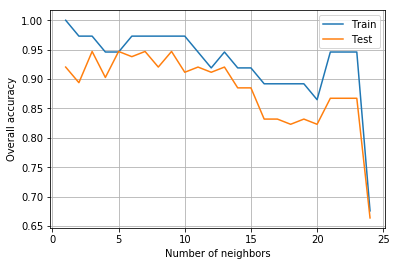

In [7]:
neighbors = sp.arange(1,25)
errors_train, errors_validation = [], []
for n_ in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n_)
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_train)
    errors_train.append(accuracy_score(y_train, y_pred))
    
    y_pred = knn.predict(X_test)
    errors_validation.append(accuracy_score(y_test, y_pred))
    
plt.plot(neighbors,errors_train)
plt.plot(neighbors,errors_validation)
plt.legend(["Train", "Test"])
plt.xlabel("Number of neighbors")
plt.ylabel("Overall accuracy")
plt.grid()